In [1]:
import os
import sys
import glob 
from functools import reduce
import seaborn as sb
import pandas as pd
import random

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# display plots in the notebook
%matplotlib inline
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
sys.path.append("../")
from simulation.data import Data
from simulation.utils import bar_range, pickle_load_obj

In [4]:
data = pickle_load_obj('../output/optimizer.pkl..')
NUM_BITMAPS = 30
NUM_TENANTS = 3000
NUM_HOSTS_PER_LEAF = 48

FileNotFoundError: [Errno 2] No such file or directory: '../output/optimizer.pkl..'

In [5]:
data = Data(data, num_tenants=NUM_TENANTS, num_hosts_per_leaf=NUM_HOSTS_PER_LEAF, num_bitmaps=NUM_BITMAPS)

NameError: name 'data' is not defined

In [6]:
data.algorithm_elapse_time().describe()

count    9.851200e+04
mean     5.404855e-04
std      1.354612e-03
min      6.099799e-08
25%      3.109999e-07
50%      4.659996e-07
75%      2.466250e-06
max      3.398673e-02
dtype: float64

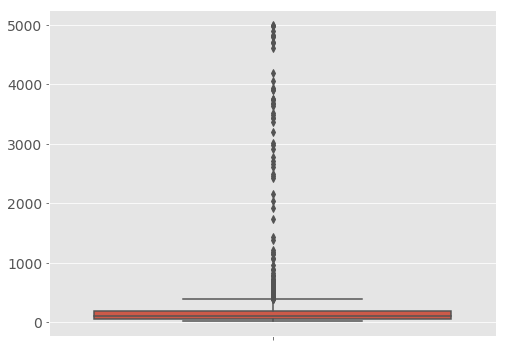

In [7]:
sb.boxplot(y=data.vm_count_for_all_tenants())

In [8]:
sum(data.vm_count_for_all_tenants())

543464

In [9]:
# sb.kdeplot(data.vm_count_for_all_tenants(), cumulative=True)

In [10]:
data.vm_count_for_all_tenants().describe()

count    3000.000000
mean      181.154667
std       433.082649
min        10.000000
25%        46.000000
50%        98.000000
75%       184.000000
max      4999.000000
dtype: float64

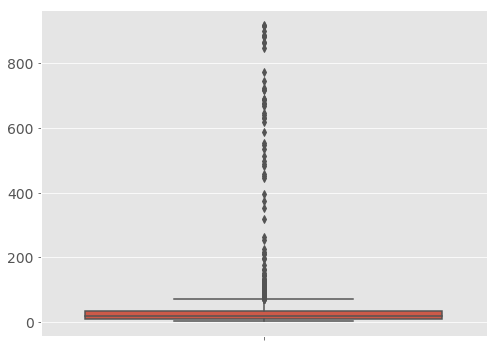

In [11]:
sb.boxplot(y=data.group_count_for_all_tenants())

In [12]:
# sb.kdeplot(data.group_count_for_all_tenants(), cumulative=True)

In [13]:
data.group_count_for_all_tenants().describe()

count    3000.000000
mean       32.837333
std        79.683976
min         1.000000
25%         8.000000
50%        18.000000
75%        33.000000
max       919.000000
dtype: float64

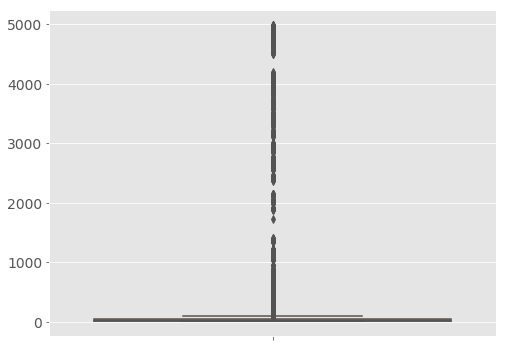

In [14]:
sb.boxplot(y=data.group_sizes_for_all_tenants())

In [15]:
# sb.kdeplot(data.group_sizes_for_all_tenants(), cumulative=True)

In [16]:
data.group_sizes_for_all_tenants().describe()

count    98512.000000
mean        60.217730
std        282.936607
min          5.000000
25%          7.000000
50%         12.000000
75%         41.000000
max       4988.000000
dtype: float64

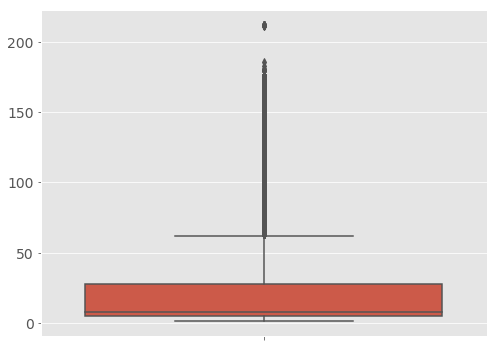

In [17]:
sb.boxplot(y=data.leafs_for_all_groups_in_all_tenants())

In [18]:
# sb.kdeplot(data.leafs_for_all_groups_in_all_tenants(), cumulative=True)

In [19]:
data.leafs_for_all_groups_in_all_tenants().describe()

count    98512.000000
mean        23.496467
std         32.295667
min          1.000000
25%          5.000000
50%          8.000000
75%         28.000000
max        212.000000
dtype: float64

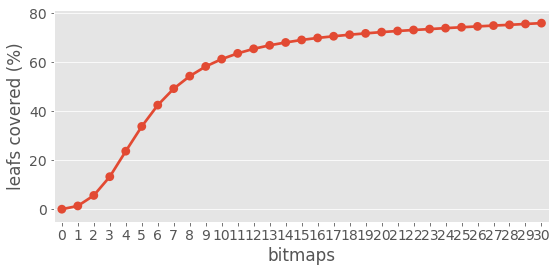

In [20]:
plot_data = pd.DataFrame()

plot_data['bitmaps'] = [i for i in range(0, NUM_BITMAPS + 1)]
plot_data['leafs covered (%)'] = data.percentage_of_groups_covered_with_varying_bitmaps(NUM_BITMAPS)

sb.factorplot(x='bitmaps', y='leafs covered (%)', data=plot_data, size=4, aspect=2)

In [21]:
data.percentage_of_groups_covered_with_varying_bitmaps(NUM_BITMAPS).describe()

count    31.000000
mean     57.287241
std      24.058029
min       0.000000
25%      51.758161
50%      69.078894
75%      73.325077
max      75.938972
dtype: float64

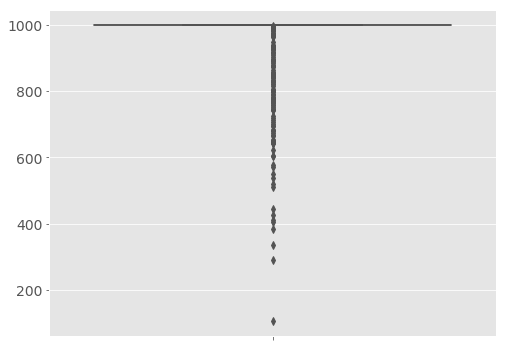

In [22]:
sb.boxplot(y=data.rules_for_all_leafs())

In [23]:
len(data.rules_for_all_leafs())

576

In [24]:
data.rules_for_all_leafs().describe()

count     576.000000
mean      954.416667
std       117.811788
min       105.000000
25%      1000.000000
50%      1000.000000
75%      1000.000000
max      1000.000000
dtype: float64

progress: 100% |################################################| Time: 0:00:01


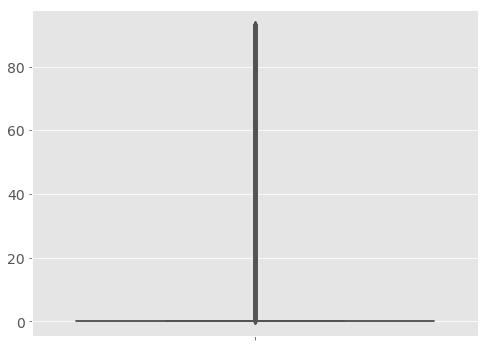

In [25]:
sb.boxplot(y=data.redundancy_for_all_groups_in_all_tenants())

In [26]:
# data.rules_for_all_groups_pre_optimization().describe()

In [27]:
# data.rules_for_all_groups_post_optimization().describe()

In [28]:
at_leaf, ut_leaf = data.traffic_stats()

progress: 100% |################################################| Time: 0:00:06


In [29]:
data.traffic_overhead(at_leaf, ut_leaf)

0    49.399169
dtype: float64

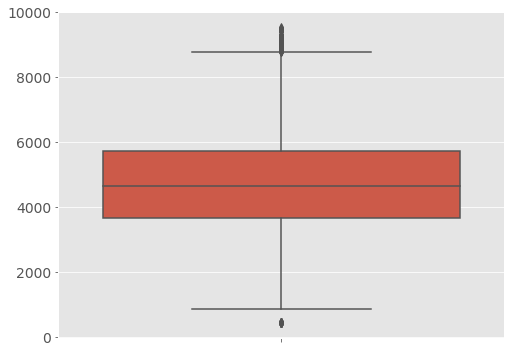

In [30]:
tt_link = data.total_traffic_per_link(at_leaf, ut_leaf)
sb.boxplot(y=tt_link)

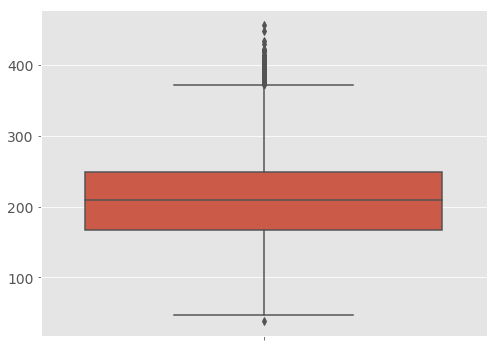

In [31]:
at_link = data.actual_traffic_per_link(at_leaf)
sb.boxplot(y=at_link)

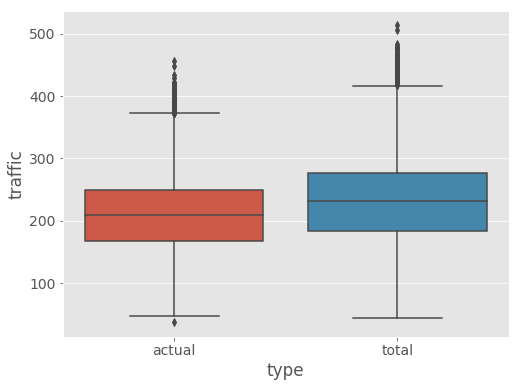

In [32]:
traffic_data = pd.DataFrame(columns=['type', 'traffic'])

at_data = pd.DataFrame()
at_data['type'] = ['actual' for _ in range(len(at_link))]
at_data['traffic'] = at_link
traffic_data = traffic_data.append(at_data)

tt_data = pd.DataFrame()
tt_data['type'] = ['total' for _ in range(len(tt_link))]
tt_data['traffic'] = tt_link
traffic_data = traffic_data.append(tt_data)

sb.boxplot(x='type', y='traffic', data=traffic_data)

In [33]:
to_link = data.traffic_overhead_per_link(tt_link, at_link)

progress: 100% |################################################| Time: 0:00:00


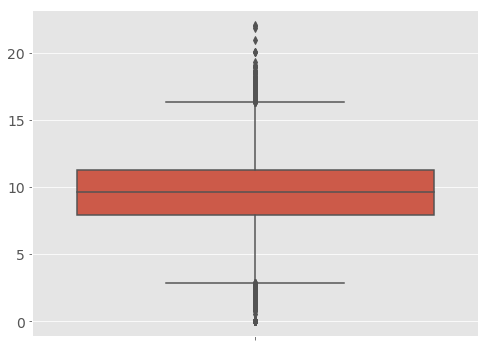

In [34]:
sb.boxplot(y=to_link)

In [35]:
to_link.describe()

count    27648.000000
mean         9.566583
std          2.633195
min          0.000000
25%          7.923594
50%          9.629630
75%         11.290323
max         22.099448
dtype: float64